# Session 4: Fitting to arbitrary functions

_Script author: louise.dash@ucl.ac.uk    
Updated: 27/01/2021_

<div class="alert alert-success"> <p><b>Intended learning outcomes:</b> </p>
By the end of this session, you should be able to:
<ul>
<li> fit data to any arbitrary function using scipy.optimize.curve_fit; </li>
<li> quantitatively evaluate the goodness of fit;  </li>
<li> reach physical conclusions based on these results. </li>
</div>

We've already seen how to fit histograms to a Gaussian, and how to use a polynomial to fit a set of data. The last thing we're going to do in this Data Analysis part of the course is to see how to perform a fit to an arbitrary function. 

In these examples, we'll be looking at whether a Lorentzian or Gaussian functions provide a better fit to some optical lineshape data. However, you can use the same method to fit *any* function, provided you can write a suitable Python function to describe your target "fit" function.

### Context for this example

The data we'll use for this session is taken from the Lab 3 Zeeman effect experiment, which some of you will do yourselves in PHAS0058. 

The Zeeman effect occurs when a spectral line is split into different components by a magnetic field. The physics of the Zeeman effect will be covered in detail in PHAS0023 "Atomic and Molecular Physics".

The Lab 3 experiment examines how the lines in the emission spectrum of a mercury discharge lamp split under a magnetic field. The student records the spectrum using a CCD camera, which yields data in the form of recorded intensity (in counts per second) vs pixel position (in pixels). 

We're not going to be considering the *positions* of the spectral lines in this task, instead we're going to be looking at the *lineshapes*. Rather than a spectral line with a single energy, the line is broadened into a wider peak by various physical effects. For example, the uncertainty principle leads to broadening which has a Lorentzian form, while there will also be thermal broadening effects, which are Gaussian in nature (there are also several other sources of broadening, with different effects). In theory, for this experiment, Lorentzian broadening is expected to dominate.

In this task we will look at an experimental spectral line recorded by a student in the Lab 3 experiment, fit it to both a Gaussian and Lorentzian, and determine which provides a better fit.

### Getting started with the code

First, we'll import the modules we will need. The new function we import in the cell below comes from the scipy.optimize library - more on this later, when we come to use it. 

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit # we're importing just this one function from scipy.optimize

plt.rcParams["patch.force_edgecolor"] = True # include outlines on histograms etc



Now we can import the csv (Comma Separated Value) file with the data the student collected, and plot it. You will need to download this file from Moodle, and as usual, put it in the same directory as this notebook.

<IPython.core.display.Javascript object>


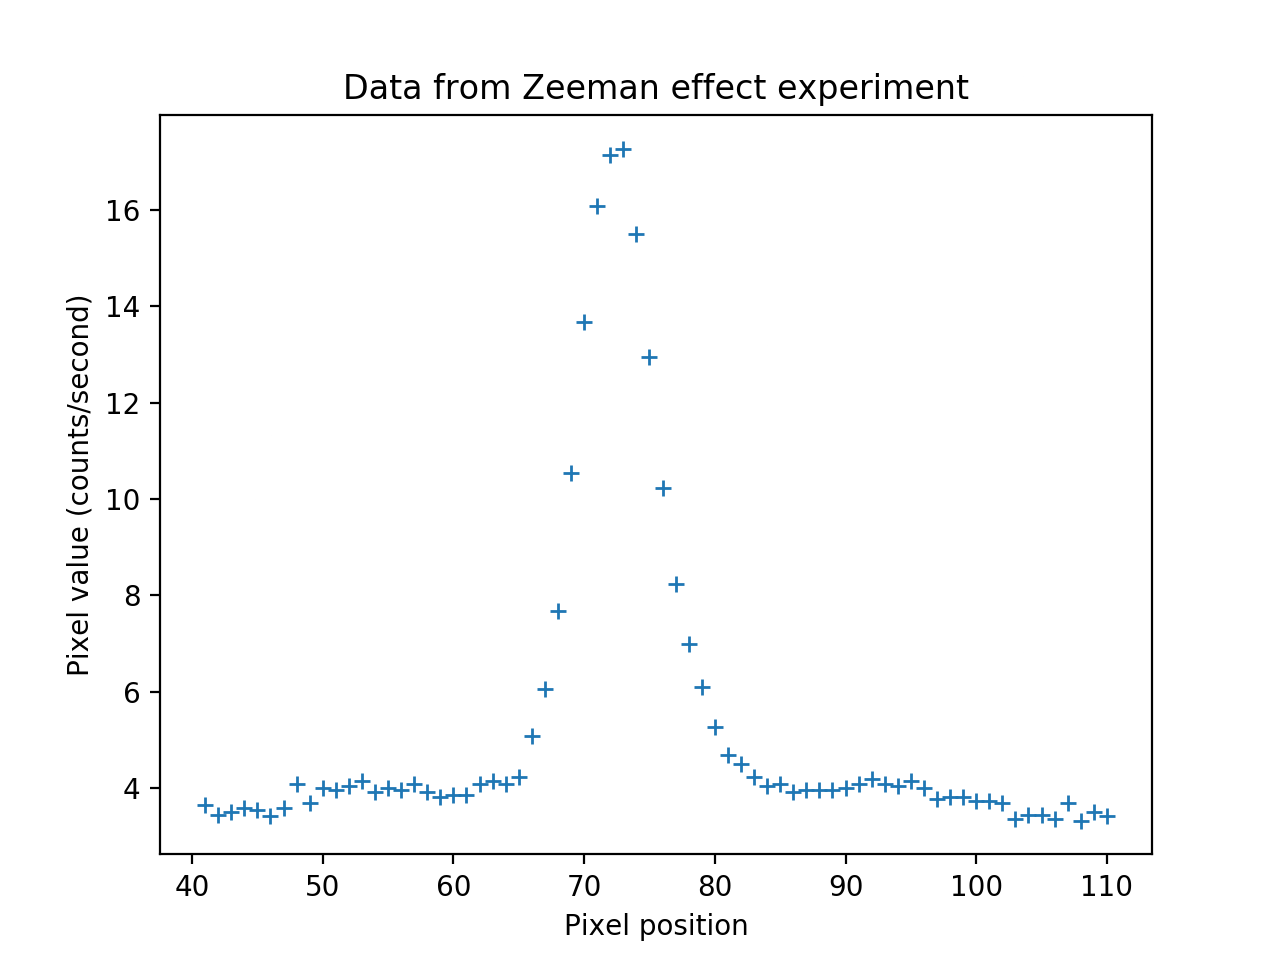

In [2]:
# import the data...
xdata,ydata = np.loadtxt('Zeeman_data.csv',delimiter=",",unpack=True) # reminder: need to set delimiter for csv files

# ...and plot it.
plt.figure()
plt.plot(xdata,ydata, '+')
plt.xlabel("Pixel position")
plt.ylabel("Pixel value (counts/second)")
plt.title("Data from Zeeman effect experiment");

We can see that we have a single peak with a constant background level. It looks feasible to attempt fitting this to a Gaussian.


In order to use `curve_fit` to fit this to a Gaussian, we need to write a "target" function to fit to, which in this case will be


$$
f(x) = y_0 + h \exp \left(\frac{-(x-x_0)^2}{2 \sigma^2}\right)
$$

(This is a slightly different definition from the one we used when we were fitting histograms to Gaussians in Session 2. Can you see why?)

The parameters for our Gaussian fit will be the mean value (`x0`), the standard deviation (`sigma`), the background value `y0` and the peak height, `h`. Here is a function that will do exactly this.

In [3]:
def gaussian(x,x0,sigma, y0, h):
    '''Returns a single value or 1D array of Gaussian function values for 
    - input x-value or array of x-values: x
    - mean value of distribution: x0
    - standard deviation of distribution: sigma
    - background value y0
    - peak height, h (measured from background level y0)'''
    gauss = h * np.exp(-(x-x0)**2/(2*sigma**2)) + y0 # the gaussian itself
    return gauss

The three parameters, x0, y0 and sigma, are (as yet) unknown. To find them, we use the scipy.optimize.curve_fit function. The full documentation for this is here: http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

We're going to do this in the simplest way possible for the moment, by just sending curve_fit the target function (our "`gaussian`" function), the independent variable (`xdata`) and the dependent variable (`ydata`). We can also, optionally, choose to send an initial guess of the parameters, as well as weightings for each of the ydata data points, but for the moment we won't do that.

The `curve_fit` routine returns two arrays. 
 * The first of these is an array of the fitted parameters - in our case this array will have four elements, as we have four parameters, `x0`, `sigma`, `y0`, and `h`.
 * The second is the matrix of covariance - an indication of the goodness of fit. We covered this in Session 3 when we were doing polynomial fitting.
 
 Let's do this, and see what results we get back:

In [4]:
#popt: Optimized parameters
#pcov: matrix of covariance.
popt,pcov = curve_fit(gaussian,xdata,ydata)

print ("popt :\n", popt)
print ("pcov :\n", pcov)

popt :
 [1.         1.         5.30499999 1.        ]
pcov :
 [[inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]]


/Users/alexrigg/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


We can see that this hasn't worked so well - `curve_fit` hasn't been able to find a fit to the data.

Instead, we'll try to make life easier for `curve_fit` by giving an initial guess for the parameters. From looking at the plot of the data, we can see that the peak is at around $x=75$, and the background around $y=3.5$. We'll try a value of 10 for $\sigma$. These values need to be given in the form of a python list of numbers, in the same order as parameters are given to our "`gaussian`" function. Remember - in Python we use `[` square brackets `]` to define a list, with the elements separated by commas.

In [5]:
guess = [75,10,3.5,18] # list of initial guess parameters
# what type of object does the variable "guess" represent?
print ("The variable 'guess' is a ", type(guess) )

The variable 'guess' is a  <class 'list'>


Now we can retry the fit:

In [6]:
popt,pcov = curve_fit(gaussian,xdata,ydata,p0=guess)
print ("popt :\n", popt)
print ("pcov :\n", pcov)

popt :
 [72.50930905  3.01525268  3.85742572 13.40680376]
pcov :
 [[ 2.02507205e-03 -3.77758184e-10  4.14321753e-12  1.66043777e-09]
 [-3.77758184e-10  2.22561784e-03 -6.30519920e-04 -4.05620885e-03]
 [ 4.14321753e-12 -6.30519920e-04  1.98236679e-03 -1.40174499e-03]
 [ 1.66043777e-09 -4.05620885e-03 -1.40174499e-03  3.10175058e-02]]


This has worked (or it should have done)! We can use the information from the matrix of covariance to calculate the error on each parameter, just as we did in the previous session for the polynomial coefficients. Remember, the error on the parameters are given by the *square roots* of the diagonal elements of the matrix of covariance.


**A python aside / hint: ** When dealing with an array like `popt` that contains numbers each representing different variables, it's sometimes useful to be able to "unpack" the array into different variables - we've already seen examples of this in the code cell above and in the second code cell when unpacking the data from the file. To unpack `popt`, we could use a line of code like:

           x0_fit, sigma_fit, y0_fit, h_fit = popt

If we wanted to then calculate the fitted line at a given x-value (in this case at x = 65), we could then use something like:
        
           fitted_point = gaussian(65, x0_fit, sigma_fit, y0_fit, h_fit)
           
or, if we don't want/need to assign individual variable names to the elements of `popt` (or whichever array we are dealing with), we could use:

           fitted_point = gaussian(65, popt[0], popt[1], popt[2], popt[3])
           
This is a bit unwieldy though, so sometimes it's useful to be able to unpack the array automatically when calling a function by using \* syntax, like this:

           fitted_point = gaussian(65, *popt)
This is much easier to deal with! You can find a fuller discussion of this in [Hill: Learning Scientific Programming with Python](https://ucl.rl.talis.com/link?url=http%3A%2F%2Flibproxy.ucl.ac.uk%2Flogin%3Fqurl%3Dhttps%253A%252F%252Fdoi.org%252F10.1017%252FCBO9781139871754&sig=4365629c2ea92d4fcb051461f54a3acbb281f6c211fe3ec598976f845929ec6c) section 2.4.3 (page 49).

The code cell below demonstrates that the two methods do give identical results:

In [7]:
# specifying the elements by hand:
print("At x = 65 our fitted Gaussian has a value of: ", gaussian(65, popt[0], popt[1], popt[2], popt[3]))

# use *syntax to unpack the elements of popt automatically:
print("Calculating the same value using * syntax:    ", gaussian(65,*popt)) 
print("Both give the same result!")

At x = 65 our fitted Gaussian has a value of:  4.46069838805483
Calculating the same value using * syntax:     4.46069838805483
Both give the same result!


<div class="alert alert-success"> 
In the cell below, you should:
<ul>
<li> calculate the errors on the parameters </li>
<li>output each parameter with its error and an appropriate text string </li>
<li>plot the original data and the fitted line on a single, appropriately labelled graph.  </li>
</ul>
<br>
    <b>HINT:</b> make sure you include enough points in your fitted line to give a smooth curve, particularly at the peak.

Once you've done this, use the checkpoint quiz on Moodle to check that your code is generating the correct numbers here (and also for the Lorentzian fit later).

</div>

<a href="https://moodle.ucl.ac.uk/mod/quiz/view.php?id=2756901" class="btn btn-primary" role="button">Click here to go open the Moodle checkpoint quiz in a new tab</a>

Parameter = 1 
 x0 = 72.50930904830264 
 Error = 0.04500080057881593 

Parameter = 2 
 sigma = 3.01525267500394 
 Error = 0.0471764543220827 

Parameter = 3 
 y0 = 3.857425720328471 
 Error = 0.04452377783763209 

Parameter = 4 
 h = 13.406803756693401 
 Error = 0.17611787470491008 



<IPython.core.display.Javascript object>


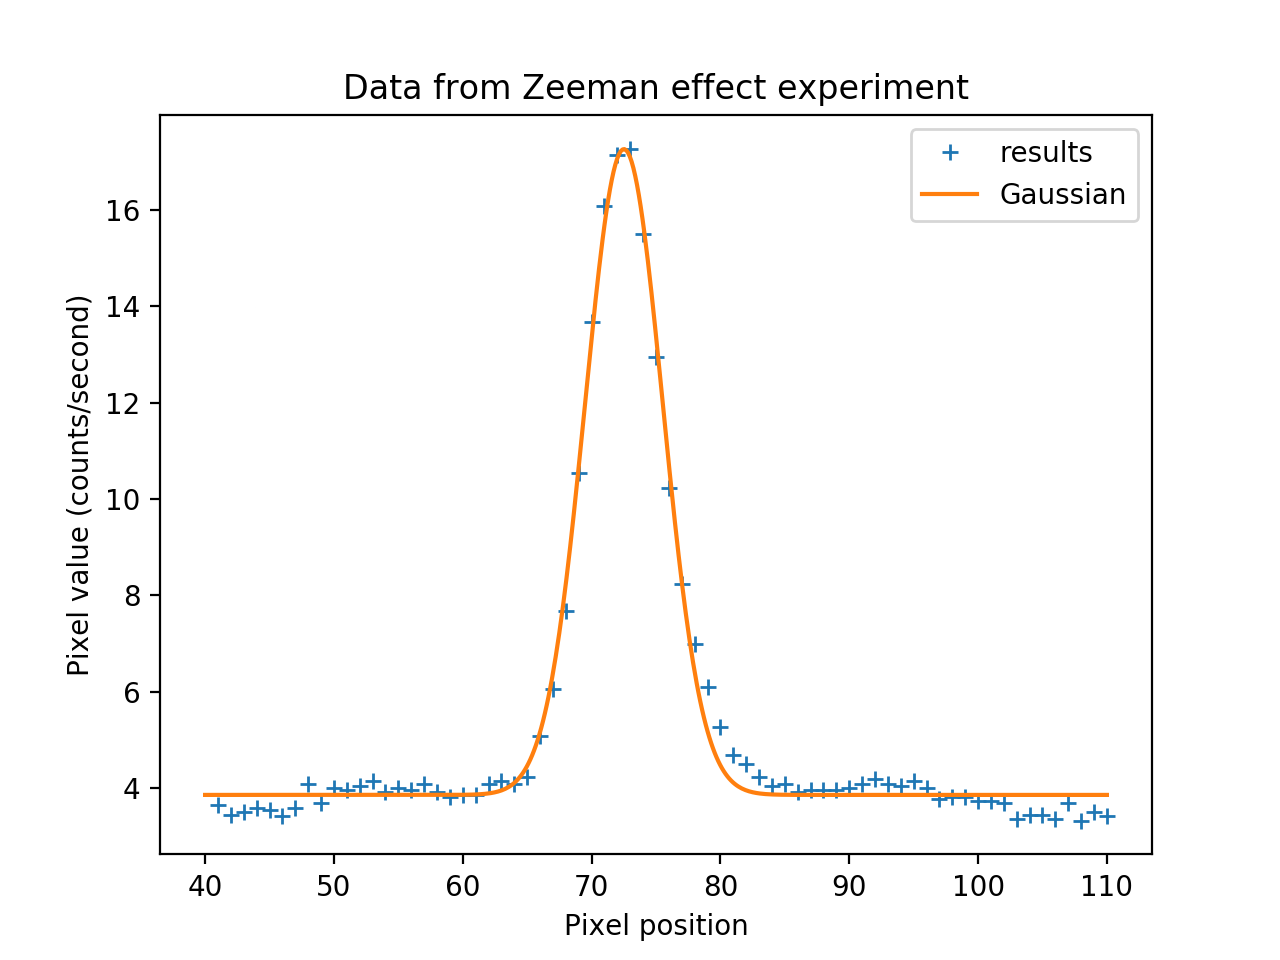

In [8]:
### STUDENT COMPLETED CELL ###
para = ["x0","sigma","y0","h"]#list of gaussian parameters 
err = np.sqrt(np.diag(pcov))#square root of the leading diagonal elements pcov 
for i in range(4):
    print("Parameter =", i+1,"\n",para[i],"=",popt[i],"\n Error =",err[i],"\n" )

x = np.linspace(40,110,500)
y = gaussian(x,*popt)
plt.figure()
plt.plot(xdata,ydata,'+',label="results")
plt.plot(x,y,label = "Gaussian")
plt.xlabel("Pixel position")
plt.ylabel("Pixel value (counts/second)")
plt.legend()
plt.title("Data from Zeeman effect experiment");

If you've done this correctly, you should obtain a good fit to the data.

In theory we'd expect a Lorentzian to produce a better fit for this data. Now you're going to try this out and see if this is what we find for this particular data set!

The appropriate form for this is 
$$
f(x) = y_0 + \frac{h}{1 + ((x - x_0)/b)^2}
$$
where $y_0$ is the background level, $x_0$ is the peak position and $b$ is the half-width at half-maximum (HWHM) of the peak, and $h$ the height of the peak relative to the background level.

<div class="alert alert-success"> 
First, write a properly formatted python function, similar in form to the "gaussian" function above, that will return a Lorentzian function for these parameters.
</div>

In [9]:
### STUDENT COMPLETED CELL ###
def loren(x,x0,b,y0,h):
    """
    Calculates the Lorentzian function
    Input:single x value or an array of x values = x
    single mean value = x0 
    single value of halfwidth at half minimum of peak = b
    single value of y0 = y0
    single value of peak height = h 
    Output:
    A single value or 1D array of Lorentzian function values 
    """
    loren = h/(1+((x-x0)/b)**2)+y0 
    return loren 
    

<div class="alert alert-success"> 
Now provide an initial guess for these parameters, and use curve_fit to calculate the best Lorentzian fit for this data. Output the calculated parameters and the matrix of covariance, just like we did for the Gaussian fit.
</div>

In [10]:
### STUDENT COMPLETED CELL ###
guess_loren = [75,10,3.5,18]#value estimated for b from graph, others taken from optimal values of gaussian fit
popt_loren,pcov_loren = curve_fit(loren,xdata,ydata,p0=guess_loren)
print("popt =", popt_loren)
print("pcov =", pcov_loren)

popt = [72.48067191  3.08300306  3.36145606 14.88518797]
pcov = [[ 3.41521150e-03  1.97141158e-06 -3.26708389e-06  1.19660362e-06]
 [ 1.97141158e-06  9.19524601e-03 -3.39309592e-03 -1.57727195e-02]
 [-3.26708389e-06 -3.39309592e-03  4.90691605e-03 -1.07969812e-03]
 [ 1.19660362e-06 -1.57727195e-02 -1.07969812e-03  7.99005976e-02]]


<div class="alert alert-success"> 
Now use these results to
<ul>
<li>calculate the error on each parameter</li>
<li>output each parameter with its error (and an appropriate text string)</li>
<li>plot the data, the fitted Gaussian and the fitted Lorentzian, all on the same labelled graph.</li>
</ul>


Once you've done this, use the checkpoint quiz on Moodle to check that your code is generating the correct numbers here.

</div>

<a href="https://moodle.ucl.ac.uk/mod/quiz/view.php?id=2756901" class="btn btn-primary" role="button">Click here to go open the Moodle checkpoint quiz in a new tab</a>

Parameter = 1 
 x0 = 72.48067190657731 
 Error = 0.058439810921315415 

Parameter = 2 
 b = 3.083003055091398 
 Error = 0.09589184535690058 

Parameter = 3 
 y0 = 3.3614560628636156 
 Error = 0.07004938290724046 

Parameter = 4 
 h = 14.88518796881668 
 Error = 0.2826669375172983 



<IPython.core.display.Javascript object>


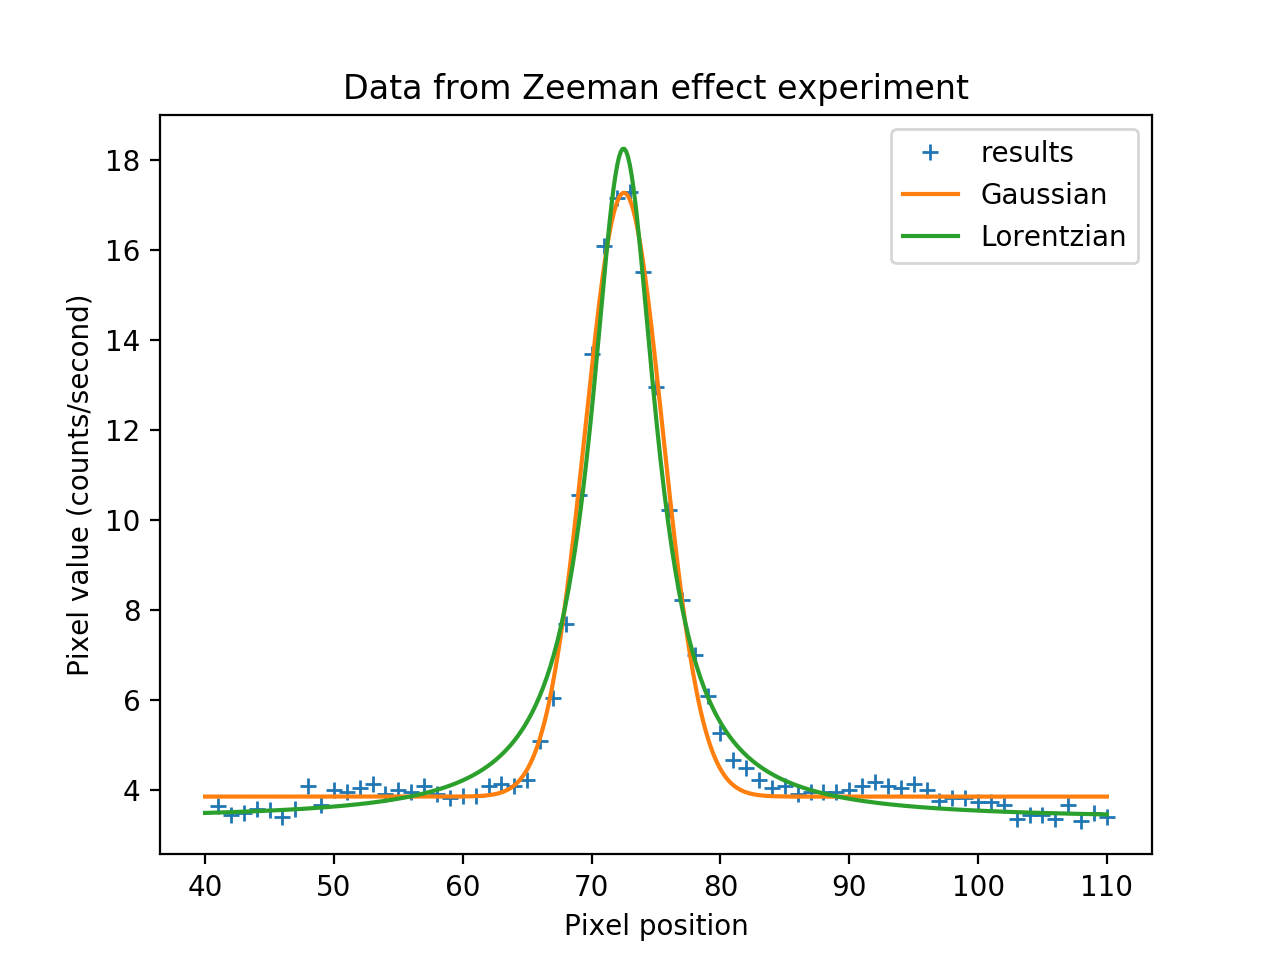

In [11]:
### STUDENT COMPLETED CELL ###
Lor = ["x0","b","y0","h"]#parameters of the lorentzian function 
err = np.sqrt(np.diag(pcov_loren))#square root of the leading diagonal elements pcov of the lorentzian 
for i in range(4):#loop through value of i = 0,1,2,3. Parameter number is i+1
    print("Parameter =", i+1,"\n",Lor[i],"=",popt_loren[i],"\n Error =",err[i],"\n" )

x = np.linspace(40,110,500)
y_loren = loren(x,*popt_loren)
y_guass = gaussian(x,*popt)
plt.figure()
plt.plot(xdata,ydata,'+',label="results")
plt.plot(x,y_guass,label = "Gaussian")
plt.plot(x,y_loren,label = "Lorentzian")
plt.xlabel("Pixel position")
plt.ylabel("Pixel value (counts/second)")
plt.legend()
plt.title("Data from Zeeman effect experiment");



### Evaluating the goodness of fit

So now we have two potential fits to our data. Looking at them, it's hard to tell which one provides the better fit. We can do this quantitatively by calculating $\chi^2$ for each fit, in the same way as we did in the previous session. 

We'll also need to know the y-error on the data points for this - which for this experiment were estimated to be $\pm 1$ counts/second.

#### 1. Gaussian.

First we'll look at the Gaussian fit. 

<div class="alert alert-success"> 
In the cell below, 
<ul>
<li>calculate the residuals divided by the y-error</li>
<li>calculate the number of degrees of freedom</li>
<li>hence calculate $\chi^2$ for the Gaussian fit.</li>
</ul>
    
Refer back to the previous session if you need a reminder of any of the definitions.
    
<b>HINT:</b> set a variable to use for the y-error, then you'll be able to experiment with this value later.
</div>


In [12]:
### STUDENT COMPLETED CELL ###
y_err = 1
deg = len(xdata)-4 #4 is the number of fitting parameters. len(xdata) is the number datapoints 
res = ydata - gaussian(xdata,*popt)#residuals are the vertical distance between data points and the fitted line 
resy = res/y_err#array of residuals divided by y_err
sqrresy = resy**2#continuing calc as for chi-squared 
sumsqrresy = np.sum(sqrresy)
redchisqr = sumsqrresy / deg
print("Reduced Chi-Squared =", redchisqr)
print("Chi-Squared =", sumsqrresy)
print("Largest residual (absolute value):", np.max(np.abs(res)))
#Finds the largest residual 

Reduced Chi-Squared = 0.10698194422306873
Chi-Squared = 7.060808318722536
Largest residual (absolute value): 0.9109288426672748


#### 2. Lorentzian

<div class="alert alert-success"> Now do the same for the Lorentzian fit, in the cell below.</div>

In [13]:
### STUDENT COMPLETED CELL ###
res_loren = ydata - loren(xdata,*popt_loren)
resl = res_loren/y_err
sqrresl = resl**2 
sumsqrresl = np.sum(sqrresl)
redchisqr = sumsqrresl / deg
print("Reduced chi squared =", redchisqr)
print("Chi Squared =", sumsqrresl)
print("Max absolute value of all residuals: ", np.max(np.abs(resl)))#to find the largest residual (absolute value)
#count number of residuals more than +/- 1.
count_large_res_lor = len(resl[resl>y_err]) + len(resl[resl<-y_err])#adapted from https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray
print("Number of residuals > y_error:", count_large_res_lor, "out of", len(xdata), "data points")

Reduced chi squared = 0.1927755642624301
Chi Squared = 12.723187241320385
Max absolute value of all residuals:  1.29263473453834
Number of residuals > y_error: 4 out of 70 data points


<div class="alert alert-success">
<b> Are these the results you'd expect? Discuss briefly in a text cell.</b>
</div>

### STUDENT COMPLETED TEXT CELL ###
Both have very low values of reduced chi-squared and well below 1, suggesting overfitting. I think this may because the y_error of +/- 1 is very wide as can be seen from the graphs. All of the residuals are less than y_error for Gaussian and only 4 out of 70 outside for Lorentzian. See output cells above.

Gaussian distribution has the better fit, according to the $\chi^2$ statistics. This can be seen clearly on the graph where it fits closer especially in the range 60-69 pixel position and at the peak.

This is a surprising result as theory predicts Lorentzian should be a better fit.

### Analysing the residuals

Another way of verifying the validity of our fits is to check the distribution of the residuals, and see if they follow a normal (Gaussian) distribution. Again, follow the same procedure as we did in the previous session and check the distribution of the calculated residuals for both fits. 




<div class="alert alert-success">
Do this in the code cells below. 
<ul>
<li>You can copy, paste and edit code from Session 3 if you want, rather than writing this from scratch. </li>

<li> You will also find it useful to look at the $x_0$ and $\sigma$ of the pdf of the residuals. Try changing your value of the yerror in the data (that you used to calculate the $\chi^2$) to the $\sigma$ you obtain here. What does this tell you?</li>
    
<li>Use a text cell to discuss what you conclude from these results.</li>
<li>Don't forget to change the yerror back to the value recorded by the student before submitting!</li>
</ul>
</div>

<IPython.core.display.Javascript object>


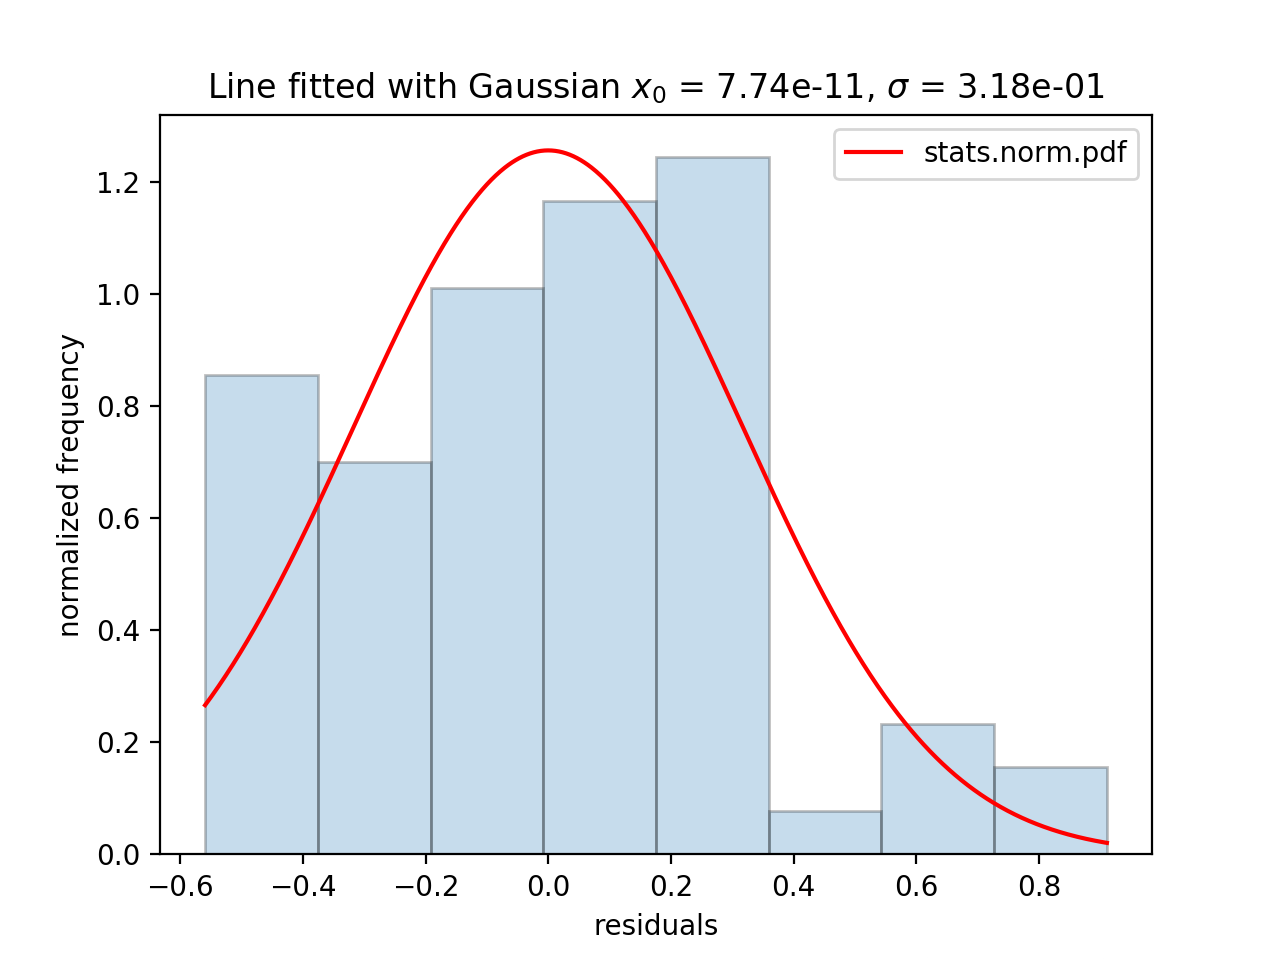

In [14]:
### STUDENT COMPLETED CELL ###
###GAUSSIAN###
import scipy.stats as stats
x0,sigma = stats.norm.fit(resy)
xm = np.mean(resy)
sigmam = np.std(resy)

x = np.linspace(np.min(resy),np.max(resy),1000)
gauss = stats.norm.pdf(x,x0,sigma)

plt.figure()
plt.hist(resy,density=True,alpha=0.25,edgecolor='k',bins=8)
#I have chosen 8 bins 
plt.plot(x,gauss,'r-',label="stats.norm.pdf")
plt.xlabel("residuals")
plt.ylabel("normalized frequency")
plt.title(f'Line fitted with Gaussian $x_0$ = {x0:8.2e}, $\sigma$ = {sigma:8.2e}')
plt.legend();

<IPython.core.display.Javascript object>


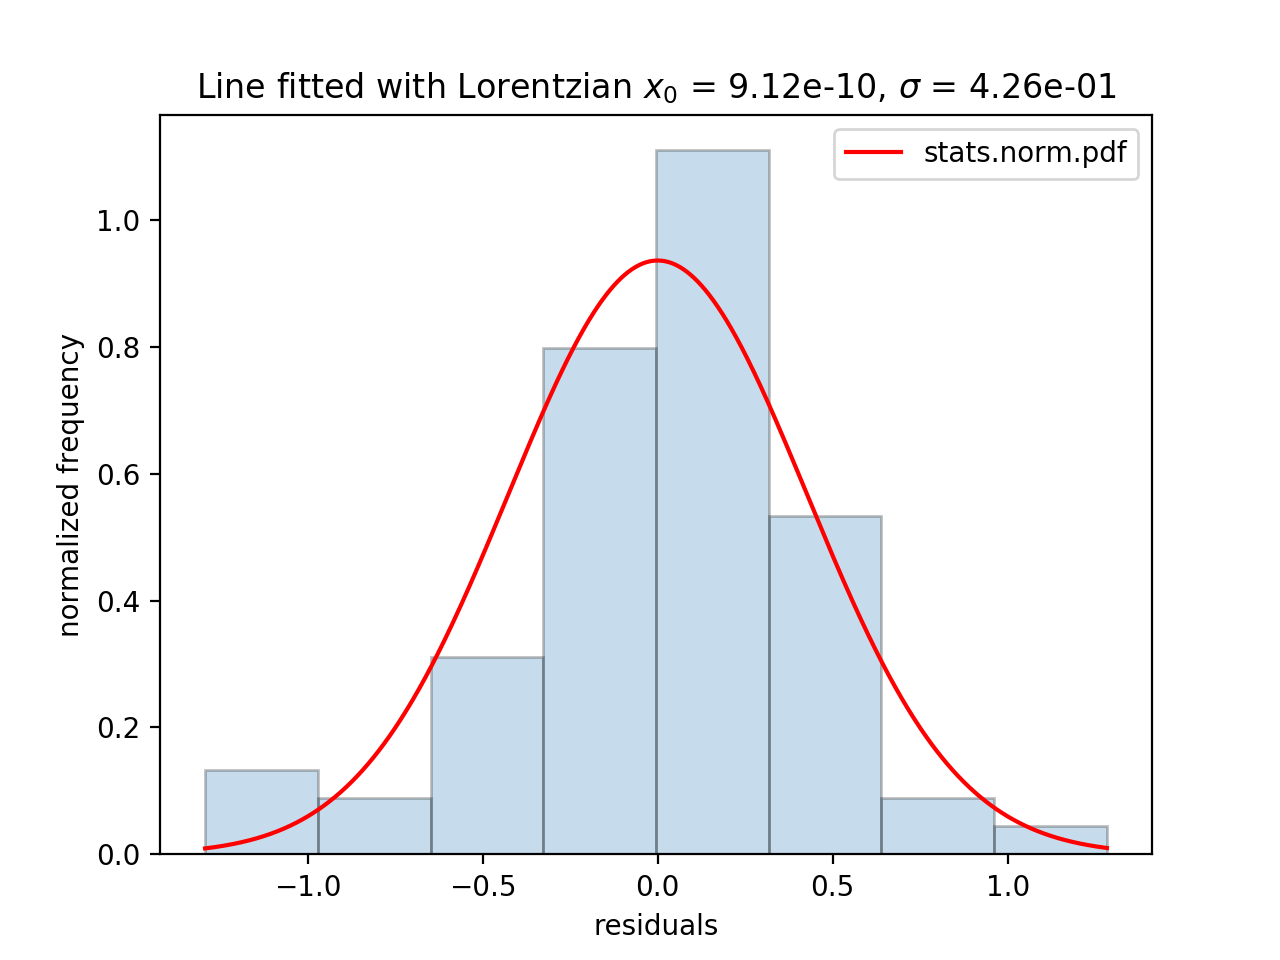

In [15]:
### STUDENT COMPLETED CELL ###
###LORENTZIAN###
import scipy.stats as stats
x0,sigma = stats.norm.fit(resl)
xm = np.mean(resl)
sigmam = np.std(resl)

x = np.linspace(np.min(resl),np.max(resl),1000)
gauss = stats.norm.pdf(x,x0,sigma)

plt.figure()
plt.hist(resl,density=True,alpha=0.25,edgecolor='k',bins=8)
plt.plot(x,gauss,'r-',label="stats.norm.pdf")
plt.xlabel("residuals")
plt.ylabel("normalized frequency")
plt.title(f'Line fitted with Lorentzian $x_0$ = {x0:8.2e}, $\sigma$ = {sigma:8.2e}')
plt.legend();

### STUDENT COMPLETED TEXT CELL ###

Changing yerror does not change the shape of the distribution or the closeness of the gaussian fit. This is not surprising as it just scales each of the residual values and hence $x_0$ and $\sigma$ just scale accordingly. As an example I changed yerror to be 0.1. The shape of each graph was the same, but the residuals as shown on the x axis increased by a factor of 10 and $x_0$ and $\sigma$ similarly increased by a factor of 10. Also the normalised frequencies change by a factor of 10, so the histogram boxes sum to 1.

Gaussian fit residuals do not look particularly convincing. Gaussian fit shows some large negative residuals- these are the points in the pixel ranges: 40-47 and 103-110. Here the gaussian fit seems to systematically higher than the experimental results. Lorentzian residuals look to be closer to a normal distribution. Having said that though, lorenztian fit is not good at the peak (higher than results) and 60-66 pixel range (lower than results). Above histogram does not consider order of residuals and this may be relevant. 
